# **Hotel Booking Analysis: Predicting the Booking Status**

In this project, we analyze a dataset related to hotel bookings to understand the factors that influence whether a booking is canceled or not. The dataset includes various features such as the number of adults, children, lead time, room type, and more. Our goal is to explore the data, perform initial analysis, and prepare it for further modeling and insights. The process involves several key step.

In [191]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

# **1. Data Preprocessing – Handling missing values, checking data types, and ensuring consistency**

In [192]:
data = pd.read_csv('./first inten project.csv')
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [193]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

We convert the "date of reservation" column to datetime format, ensuring consistency while handling invalid formats by coercing errors to missing values. We observe that 37 missing values were introduced during the date conversion, indicating invalid formats that couldn't be processed

In [195]:
# Convert to datetime format
data['converted_date'] = pd.to_datetime(data['date of reservation'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  object        
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  object        
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

In [196]:
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


We filter and display rows where 'converted_date' is NaT, indicating missing values due to invalid date formats. In this case, the issue is caused by incorrect dates like "2018-2-29", which is invalid as February has only 28 or 29 days

In [197]:
# Filter rows where 'converted date' is NaT
invalid_rows = data[data['converted_date'].isna()][['date of reservation', 'converted_date']]

# Display the result
invalid_rows

,date of reservation,converted_date
2626,2018-2-29,NaT
3677,2018-2-29,NaT
5600,2018-2-29,NaT
6343,2018-2-29,NaT
7648,2018-2-29,NaT
8000,2018-2-29,NaT
8989,2018-2-29,NaT
9153,2018-2-29,NaT
9245,2018-2-29,NaT
9664,2018-2-29,NaT


To handle this issue, we replace the invalid date "2018-2-29" with "2/28/2018", ensuring a valid format. Then, we reapply the datetime conversion and drop the temporary 'converted_date' column

In [198]:
data.loc[data['date of reservation'] == '2018-2-29', 'date of reservation'] = '2/28/2018'
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
data = data.drop(columns=['converted_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  object        
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  object        
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

We check for duplicate values in the dataset and confirm that there are none, ensuring data integrity

In [199]:
data.duplicated().sum()

0

We display statistical information of the numerical features, which provides insights into key metrics like mean, standard deviation, min, and max values

In [200]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,2018-05-24 13:22:45.886730240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,NaN


We display statistical information of the categorical features, which provides insights into key metrics like unique, top, freq values.

In [201]:
data.describe(include='O')

,Booking_ID,type of meal,room type,market segment type,booking status
count,36285,36285,36285,36285,36285
unique,36285,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27842,28138,23221,24396


The plot confirms that the dataset is imbalanced, meaning one class has significantly more samples than the other, which may affect model performance

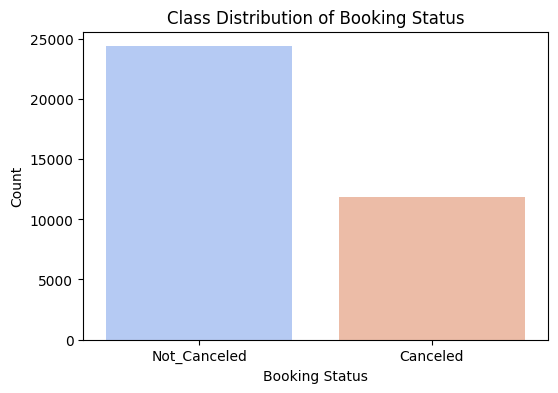

In [202]:
# Count the occurrences of each class
class_counts = data['booking status'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm')
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.title("Class Distribution of Booking Status")
plt.show()

# **2. Outlier Detection and Handling – Identifying and managing outliers using techniques like IQR or Z-score, and addressing imbalanced data**

To detect outliers, we use the Interquartile Range (IQR) method, which identifies values that fall outside the typical range of a dataset. This function calculates Q1 (25th percentile) and Q3 (75th percentile), then determines outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR

In [203]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

To handle detected outliers, we consider three approaches:

1.   Removing Outliers – Eliminating rows with outlier values to maintain data consistency
2.   Keeping Outliers – Retaining them if they provide meaningful insights or reflect real-world scenarios.
3.   Clipping Outliers – Replacing extreme values with the lower and upper bounds to reduce their impact.

We can use the SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic samples for the minority class

# Case1: Removing Outliers

After examining the unique values of all numerical features, we identify 'lead time' and 'average price' as the columns containing outliers, requiring appropriate handling

In [48]:
df1 = data

In [49]:
# Dictionary to store outliers before removing them
outliers_dict = {}
cols = ['lead time', 'average price ']

# Iterate over all numerical columns
for column in cols:
    # Detect outliers
    outliers = detect_outliers_iqr(df1, column)
    outliers_dict[column] = outliers  # Store detected outliers

    # Remove outliers from the original data
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only values within the valid range
    df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

# Print detected outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values: {outliers[column].values}")
    print("\n")

Outliers in lead time:
Number of outliers: 1332
Outlier values: [346 320 443 ... 304 292 346]


Outliers in average price :
Number of outliers: 1608
Outlier values: [258.     0.   184.24 ...   0.     1.   216.  ]




In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33345 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                33345 non-null  object        
 1   number of adults          33345 non-null  int64         
 2   number of children        33345 non-null  int64         
 3   number of weekend nights  33345 non-null  int64         
 4   number of week nights     33345 non-null  int64         
 5   type of meal              33345 non-null  object        
 6   car parking space         33345 non-null  int64         
 7   room type                 33345 non-null  object        
 8   lead time                 33345 non-null  int64         
 9   market segment type       33345 non-null  object        
 10  repeated                  33345 non-null  int64         
 11  P-C                       33345 non-null  int64         
 12  P-not-C                

# **3.1. Feature Engineering – Selecting relevant features and performing feature extraction**

To clean the 'Booking_ID' column, we extract only the numeric values using regular expressions and convert them to integer type for consistency and easier processing

In [51]:
df1['Booking_ID'] = df1['Booking_ID'].str.extract('(\d+)').astype(int)

We apply an ordinal transformation to the 'type of meal' column by mapping meal categories to numerical values based on their order, making the data suitable for modeling

In [52]:
meal_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2
}
df1['type of meal'] = df1['type of meal'].map(meal_mapping)

Similar to 'Booking_ID', we extract the numeric values from the 'room type' column and convert them to integers for consistency and easier processing

In [53]:
df1['room type'] = df1['room type'].str.extract('(\d+)').astype(int)

We apply one-hot encoding to the 'market segment type' column, creating binary features for each category

In [54]:
df1 = pd.get_dummies(df1, columns=['market segment type'], prefix='segment', drop_first=True)

# Convert only the new segment columns to integer
segment_cols = [col for col in df1.columns if col.startswith('segment_')]
df1[segment_cols] = df1[segment_cols].astype(int)

For the target variable 'booking status', we perform label encoding, mapping 'Not_Canceled' to 0 and 'Canceled' to 1, making it suitable for binary classification

In [55]:
df1['booking status'] = df1['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})

We extract date-based features from the 'date of reservation' column, including year, month, day, day of the week, quarter, and whether the booking was made on a weekend. After extracting these features, we drop the original date column

In [56]:
df1['year'] = df1['date of reservation'].dt.year
df1['month'] = df1['date of reservation'].dt.month
df1['day'] = df1['date of reservation'].dt.day
df1['day_of_week'] = df1['date of reservation'].dt.weekday  # Monday=0, Sunday=6
df1['is_weekend'] = (df1['day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun, else 0
df1['quarter'] = df1['date of reservation'].dt.quarter
df1.drop(columns=['date of reservation'], inplace=True)

In [57]:
df1

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,repeated,...,segment_Complementary,segment_Corporate,segment_Offline,segment_Online,year,month,day,day_of_week,is_weekend,quarter
0,1,1,1,2,5,1,0,1,224,0,...,0,0,1,0,2015,10,2,4,0,4
1,2,1,0,1,3,0,0,1,5,0,...,0,0,0,1,2018,11,6,1,0,4
2,3,2,1,1,3,1,0,1,1,0,...,0,0,0,1,2018,2,28,2,0,1
3,4,1,0,0,2,1,0,1,211,0,...,0,0,0,1,2017,5,20,5,1,2
4,5,1,0,1,2,0,0,1,48,0,...,0,0,0,1,2018,4,11,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36279,36281,2,0,1,1,0,0,1,48,0,...,0,0,0,1,2018,4,11,2,0,2
36281,36283,2,0,1,3,1,0,1,34,0,...,0,0,0,1,2017,10,15,6,1,4
36282,36284,2,0,1,3,1,0,4,83,0,...,0,0,0,1,2018,12,26,2,0,4
36283,36285,3,0,0,4,1,0,1,121,0,...,0,0,1,0,2018,7,6,4,0,3


In [58]:
y = df1['booking status']                 # Target (Dependent variable)
x = df1.drop(columns=['booking status'])  # Features (Independent variables)

In [59]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Verify the new class distribution
print(y_resampled.value_counts())

booking status
0    22921
1    22921
Name: count, dtype: int64


We split the dataset into training (80%) and testing (20%) sets using stratified sampling (stratify=y) to maintain the original class distribution, ensuring a balanced split for model training and evaluation

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [61]:
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (36673, 24) (36673,)
Test set: (9169, 24) (9169,)


For standardization, we use StandardScaler, which transforms features to have a mean of 0 and standard deviation of 1 (Z-score normalization). We fit the scaler on the training data and apply the transformation to both train and test sets to maintain consistency

In [62]:
# Initialize scalers
scaler_standard = StandardScaler()   # Standardization (Z-score)

# Apply scaling
x_train = scaler_standard.fit_transform(x_train)
x_test = scaler_standard.transform(x_test)  # Use transform (not fit_transform) on test set

We train multiple classification models to predict the booking status

In [63]:
# Define models including multiple KNN versions
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN (k=3)", KNeighborsClassifier(n_neighbors=3)),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("KNN (k=7)", KNeighborsClassifier(n_neighbors=7)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Support Vector Machine", SVC()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Train each model and measure training time
trained_models = {}
training_times = {}

for name, model in models:
    start_time = time.time()  # Start time
    model.fit(x_train, y_train)  # Train model
    end_time = time.time()  # End time

    trained_models[name] = model  # Store trained model
    training_times[name] = end_time - start_time  # Calculate and store training time

# Display training times
for name, t in training_times.items():
    print(f"{name}: Training Time = {t:.4f} seconds")

print("All models trained successfully!")

Logistic Regression: Training Time = 0.0765 seconds
KNN (k=3): Training Time = 0.0088 seconds
KNN (k=5): Training Time = 0.0079 seconds
KNN (k=7): Training Time = 0.0075 seconds
Random Forest: Training Time = 6.4327 seconds
Support Vector Machine: Training Time = 41.6548 seconds
XGBoost: Training Time = 0.5607 seconds
All models trained successfully!



Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      4585
           1       0.82      0.82      0.82      4584

    accuracy                           0.82      9169
   macro avg       0.82      0.82      0.82      9169
weighted avg       0.82      0.82      0.82      9169



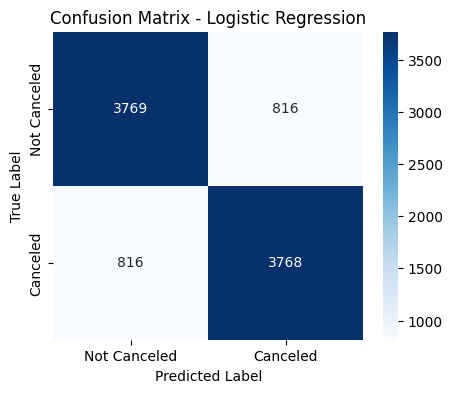


KNN (k=3) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4585
           1       0.85      0.86      0.86      4584

    accuracy                           0.86      9169
   macro avg       0.86      0.86      0.86      9169
weighted avg       0.86      0.86      0.86      9169



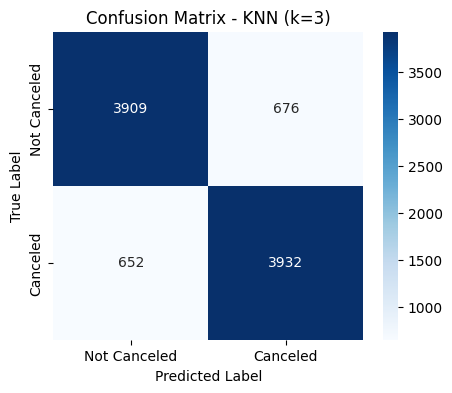


KNN (k=5) - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4585
           1       0.86      0.87      0.86      4584

    accuracy                           0.86      9169
   macro avg       0.86      0.86      0.86      9169
weighted avg       0.86      0.86      0.86      9169



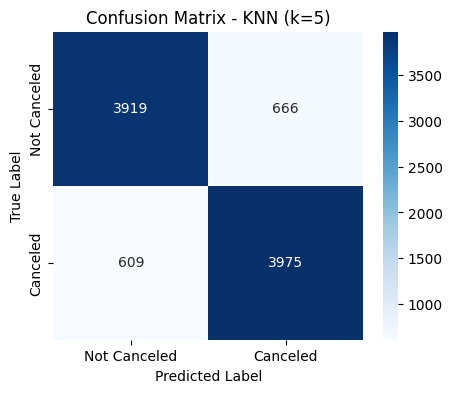


KNN (k=7) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      4585
           1       0.85      0.87      0.86      4584

    accuracy                           0.86      9169
   macro avg       0.86      0.86      0.86      9169
weighted avg       0.86      0.86      0.86      9169



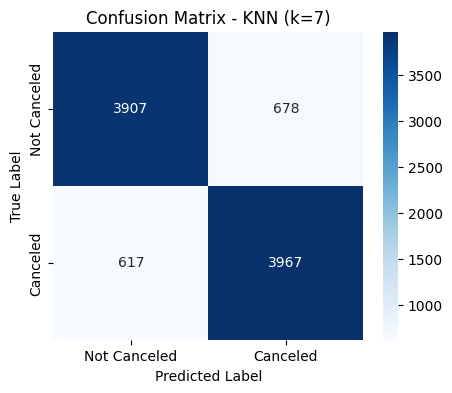


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      4585
           1       0.93      0.90      0.91      4584

    accuracy                           0.92      9169
   macro avg       0.92      0.92      0.92      9169
weighted avg       0.92      0.92      0.92      9169



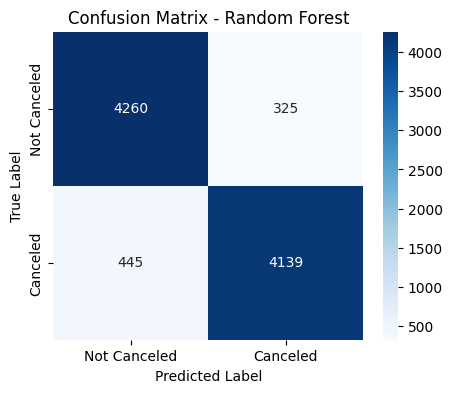


Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4585
           1       0.86      0.87      0.86      4584

    accuracy                           0.86      9169
   macro avg       0.86      0.86      0.86      9169
weighted avg       0.86      0.86      0.86      9169



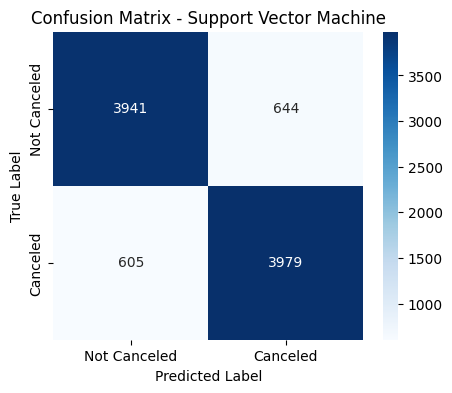


XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4585
           1       0.92      0.90      0.91      4584

    accuracy                           0.91      9169
   macro avg       0.91      0.91      0.91      9169
weighted avg       0.91      0.91      0.91      9169



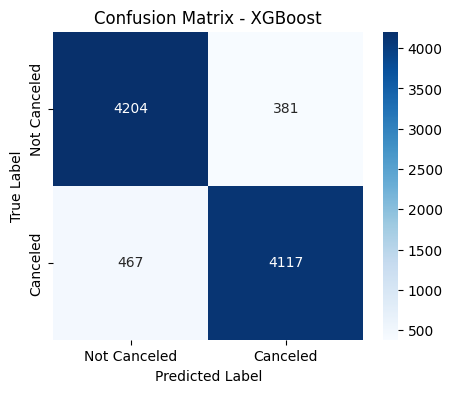

In [66]:
# Initialize a list to store results
results1 = []

for name, model in trained_models.items():
    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    prediction_time = end_time - start_time

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    results1.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "Prediction Time (s)": prediction_time
    })

    # Print classification report
    print(f"\n{name} - Classification Report:\n", classification_report(y_test, y_pred))

    # Compute and visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Canceled", "Canceled"],
                yticklabels=["Not Canceled", "Canceled"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Convert results list into a DataFrame for comparison
results_df1 = pd.DataFrame(results1)

In [68]:
# Display sorted results by Accuracy
print("\nModel Performance Comparison -Case1- :\n")
results_df1.sort_values(by="Accuracy", ascending=False, inplace=True)
results_df1


Model Performance Comparison -Case1- :



,Model,Accuracy,F1 Score,Precision,Recall,Prediction Time (s)
4,Random Forest,0.916021,0.914898,0.927195,0.902923,0.220105
6,XGBoost,0.907514,0.906628,0.915296,0.898124,0.028355
5,Support Vector Machine,0.863780,0.864342,0.860697,0.868019,9.392739
2,KNN (k=5),0.860944,0.861789,0.856496,0.867147,4.219992
3,KNN (k=7),0.858763,0.859681,0.854037,0.865401,3.144686
1,KNN (k=3),0.855164,0.855527,0.853299,0.857766,4.668248
0,Logistic Regression,0.822009,0.821990,0.821990,0.821990,0.004726


# Case2: Keeping Outliers

In [158]:
df2 = data

In [159]:
df2['Booking_ID'] = df2['Booking_ID'].str.extract('(\d+)').astype(int)

In [160]:
meal_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}
df2['type of meal'] = df2['type of meal'].map(meal_mapping)

In [161]:
df2['room type'] = df2['room type'].str.extract('(\d+)').astype(int)

In [162]:
df2 = pd.get_dummies(df2, columns=['market segment type'], prefix='segment', drop_first=True)

# Convert only the new segment columns to integer
segment_cols = [col for col in df2.columns if col.startswith('segment_')]
df2[segment_cols] = df2[segment_cols].astype(int)

In [163]:
df2['booking status'] = df2['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [164]:
df2['year'] = df2['date of reservation'].dt.year
df2['month'] = df2['date of reservation'].dt.month
df2['day'] = df2['date of reservation'].dt.day
df2['day_of_week'] = df2['date of reservation'].dt.weekday  # Monday=0, Sunday=6
df2['is_weekend'] = (df2['day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun, else 0
df2['quarter'] = df2['date of reservation'].dt.quarter
df2.drop(columns=['date of reservation'], inplace=True)

In [165]:
y = df2['booking status']                 # Target (Dependent variable)
x = df2.drop(columns=['booking status'])  # Features (Independent variables)

In [166]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Verify the new class distribution
print(y_resampled.value_counts())

booking status
0    24396
1    24396
Name: count, dtype: int64


In [167]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [168]:
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (39033, 24) (39033,)
Test set: (9759, 24) (9759,)


In [169]:
# Initialize scalers
scaler_standard = StandardScaler()

# Apply scaling
x_train = scaler_standard.fit_transform(x_train)
x_test = scaler_standard.transform(x_test)

In [171]:
# Define models including multiple KNN versions
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN (k=3)", KNeighborsClassifier(n_neighbors=3)),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("KNN (k=7)", KNeighborsClassifier(n_neighbors=7)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Support Vector Machine", SVC()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Train each model and measure training time
trained_models = {}
training_times = {}

for name, model in models:
    start_time = time.time()  # Start time
    model.fit(x_train, y_train)  # Train model
    end_time = time.time()  # End time

    trained_models[name] = model  # Store trained model
    training_times[name] = end_time - start_time  # Calculate and store training time

# Display training times
for name, t in training_times.items():
    print(f"{name}: Training Time = {t:.4f} seconds")

print("All models trained successfully!")

Logistic Regression: Training Time = 0.1204 seconds
KNN (k=3): Training Time = 0.0077 seconds
KNN (k=5): Training Time = 0.0079 seconds
KNN (k=7): Training Time = 0.0085 seconds
Random Forest: Training Time = 6.8886 seconds
Support Vector Machine: Training Time = 48.4461 seconds
XGBoost: Training Time = 0.5732 seconds
All models trained successfully!



Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      4880
           1       0.83      0.83      0.83      4879

    accuracy                           0.83      9759
   macro avg       0.83      0.83      0.83      9759
weighted avg       0.83      0.83      0.83      9759



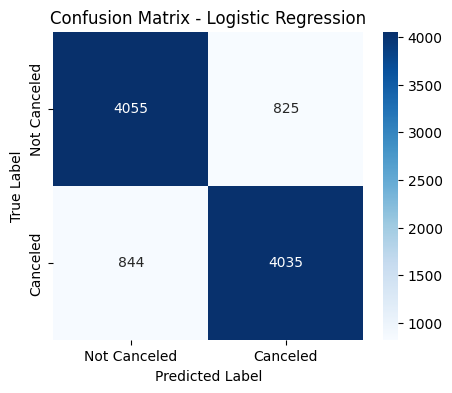


KNN (k=3) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4880
           1       0.87      0.86      0.86      4879

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759



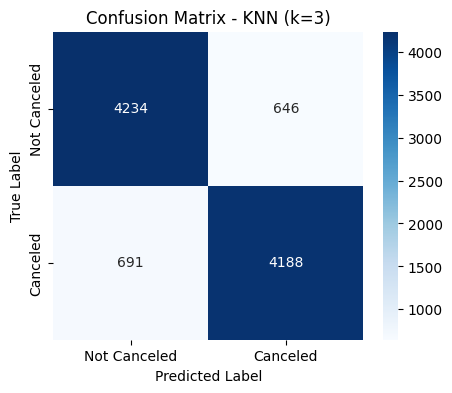


KNN (k=5) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4880
           1       0.86      0.85      0.86      4879

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759



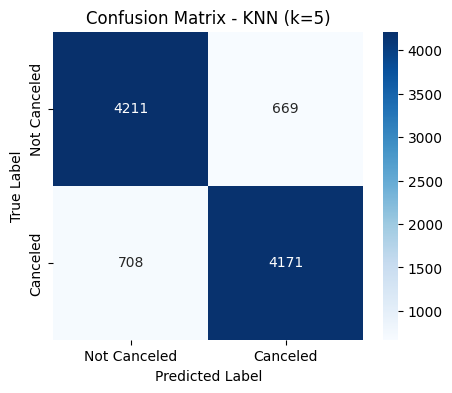


KNN (k=7) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4880
           1       0.86      0.86      0.86      4879

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759



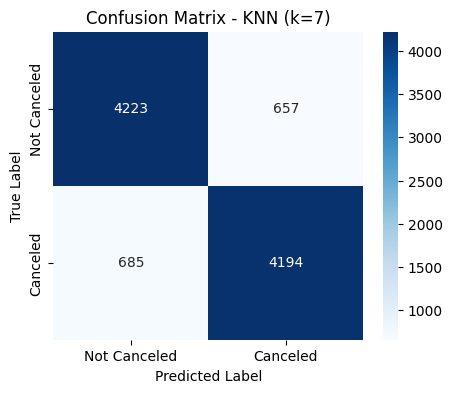


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      4880
           1       0.93      0.90      0.92      4879

    accuracy                           0.92      9759
   macro avg       0.92      0.92      0.92      9759
weighted avg       0.92      0.92      0.92      9759



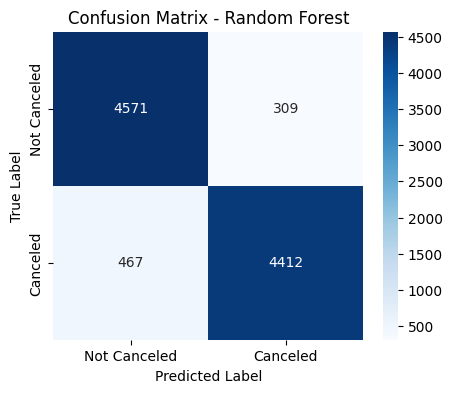


Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4880
           1       0.87      0.87      0.87      4879

    accuracy                           0.87      9759
   macro avg       0.87      0.87      0.87      9759
weighted avg       0.87      0.87      0.87      9759



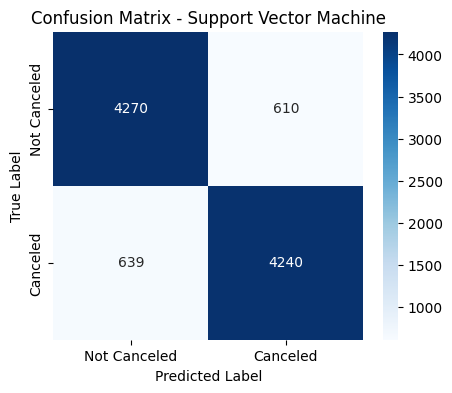


XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4880
           1       0.92      0.90      0.91      4879

    accuracy                           0.91      9759
   macro avg       0.91      0.91      0.91      9759
weighted avg       0.91      0.91      0.91      9759



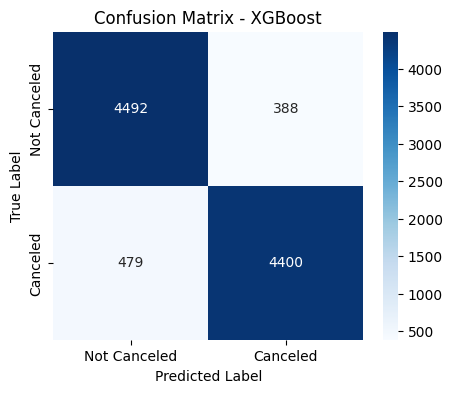

In [172]:
# Initialize a list to store results
results2 = []

for name, model in trained_models.items():
    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    prediction_time = end_time - start_time

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    results2.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "Prediction Time (s)": prediction_time
    })

    # Print classification report
    print(f"\n{name} - Classification Report:\n", classification_report(y_test, y_pred))

    # Compute and visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Canceled", "Canceled"],
                yticklabels=["Not Canceled", "Canceled"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Convert results list into a DataFrame for comparison
results_df2 = pd.DataFrame(results2)

In [173]:
# Display sorted results by Accuracy
print("\nModel Performance Comparison -Case2- :\n")
results_df2.sort_values(by="Accuracy", ascending=False, inplace=True)
results_df2


Model Performance Comparison -Case2- :



,Model,Accuracy,F1 Score,Precision,Recall,Prediction Time (s)
4,Random Forest,0.920484,0.919167,0.934548,0.904284,0.246479
6,XGBoost,0.911159,0.910313,0.918964,0.901824,0.036314
5,Support Vector Machine,0.872016,0.871621,0.874227,0.869031,10.404156
1,KNN (k=3),0.862998,0.862349,0.866363,0.858373,4.069548
3,KNN (k=7),0.862486,0.862076,0.864564,0.859602,2.894231
2,KNN (k=5),0.858899,0.858319,0.861777,0.854888,2.916217
0,Logistic Regression,0.828978,0.828627,0.830247,0.827014,0.004872


# Case3: Clipping Outliers

In [204]:
df3 = data

In [205]:
# Dictionary to store outliers before clipping
outliers_dict = {}
cols = ['lead time', 'average price ']

# Iterate over all numerical columns
for column in cols:
    # Detect outliers
    outliers = detect_outliers_iqr(df3, column)
    outliers_dict[column] = outliers  # Store detected outliers

    # Compute IQR, lower bound, and upper bound
    Q1 = df3[column].quantile(0.25)
    Q3 = df3[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values: Replace outliers with the boundary values
    df3[column] = df3[column].clip(lower=lower_bound, upper=upper_bound)

# Print detected outliers before clipping
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values before clipping: {outliers[column].values}")
    print("\n")

Outliers in lead time:
Number of outliers: 1332
Outlier values before clipping: [346 320 443 ... 304 292 346]


Outliers in average price :
Number of outliers: 1696
Outlier values before clipping: [258.     0.   184.24 ...   0.     1.   216.  ]




In [206]:
df3['Booking_ID'] = df3['Booking_ID'].str.extract('(\d+)').astype(int)

In [208]:
meal_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}
df3['type of meal'] = df3['type of meal'].map(meal_mapping)

In [209]:
df3['room type'] = df3['room type'].str.extract('(\d+)').astype(int)

In [210]:
df3 = pd.get_dummies(df3, columns=['market segment type'], prefix='segment', drop_first=True)

# Convert only the new segment columns to integer
segment_cols = [col for col in df3.columns if col.startswith('segment_')]
df3[segment_cols] = df3[segment_cols].astype(int)

In [211]:
df3['booking status'] = df3['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [212]:
df3['year'] = df3['date of reservation'].dt.year
df3['month'] = df3['date of reservation'].dt.month
df3['day'] = df3['date of reservation'].dt.day
df3['day_of_week'] = df3['date of reservation'].dt.weekday  # Monday=0, Sunday=6
df3['is_weekend'] = (df3['day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun, else 0
df3['quarter'] = df3['date of reservation'].dt.quarter
df3.drop(columns=['date of reservation'], inplace=True)

In [213]:
y = df3['booking status']                 # Target (Dependent variable)
x = df3.drop(columns=['booking status'])  # Features (Independent variables)

In [214]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Verify the new class distribution
print(y_resampled.value_counts())

booking status
0    24396
1    24396
Name: count, dtype: int64


In [215]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [216]:
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (39033, 24) (39033,)
Test set: (9759, 24) (9759,)


In [217]:
# Initialize scalers
scaler_standard = StandardScaler()   # Standardization (Z-score)

# Apply scaling
x_train = scaler_standard.fit_transform(x_train)
x_test = scaler_standard.transform(x_test)  # Use transform (not fit_transform) on test set

In [219]:
# Define models including multiple KNN versions
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN (k=3)", KNeighborsClassifier(n_neighbors=3)),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("KNN (k=7)", KNeighborsClassifier(n_neighbors=7)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Support Vector Machine", SVC()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Train each model and measure training time
trained_models = {}
training_times = {}

for name, model in models:
    start_time = time.time()  # Start time
    model.fit(x_train, y_train)  # Train model
    end_time = time.time()  # End time

    trained_models[name] = model  # Store trained model
    training_times[name] = end_time - start_time  # Calculate and store training time

# Display training times
for name, t in training_times.items():
    print(f"{name}: Training Time = {t:.4f} seconds")

print("All models trained successfully!")

Logistic Regression: Training Time = 0.1081 seconds
KNN (k=3): Training Time = 0.0085 seconds
KNN (k=5): Training Time = 0.0081 seconds
KNN (k=7): Training Time = 0.0085 seconds
Random Forest: Training Time = 7.0827 seconds
Support Vector Machine: Training Time = 45.6885 seconds
XGBoost: Training Time = 0.5306 seconds
All models trained successfully!



Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      4880
           1       0.83      0.83      0.83      4879

    accuracy                           0.83      9759
   macro avg       0.83      0.83      0.83      9759
weighted avg       0.83      0.83      0.83      9759



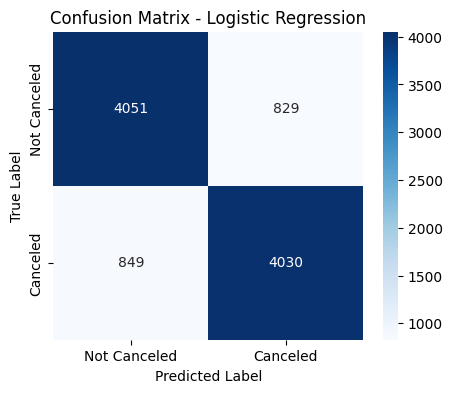


KNN (k=3) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4880
           1       0.87      0.86      0.86      4879

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759



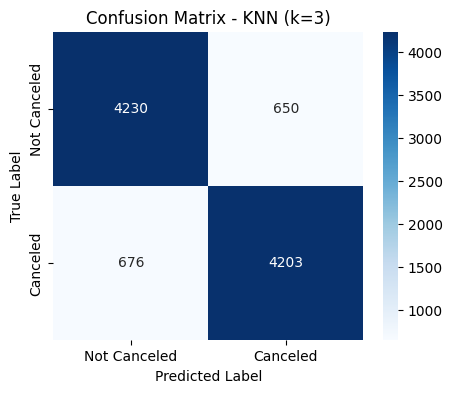


KNN (k=5) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4880
           1       0.86      0.86      0.86      4879

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759



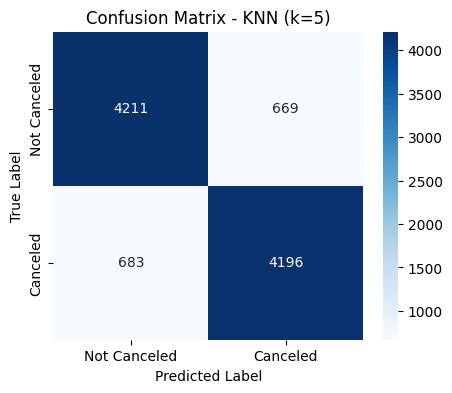


KNN (k=7) - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4880
           1       0.86      0.86      0.86      4879

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759



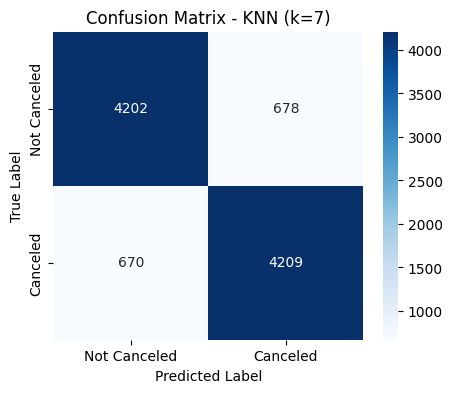


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4880
           1       0.94      0.90      0.92      4879

    accuracy                           0.92      9759
   macro avg       0.92      0.92      0.92      9759
weighted avg       0.92      0.92      0.92      9759



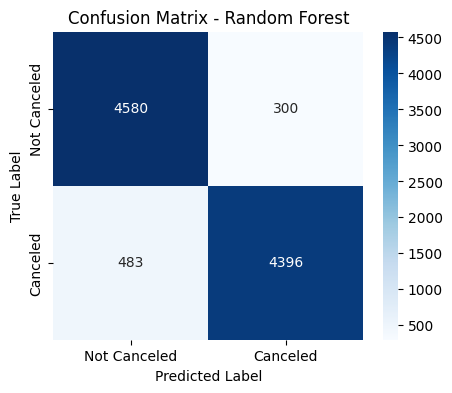


Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4880
           1       0.87      0.87      0.87      4879

    accuracy                           0.87      9759
   macro avg       0.87      0.87      0.87      9759
weighted avg       0.87      0.87      0.87      9759



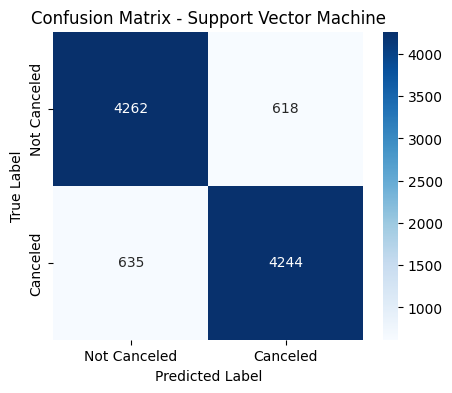


XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4880
           1       0.92      0.90      0.91      4879

    accuracy                           0.91      9759
   macro avg       0.91      0.91      0.91      9759
weighted avg       0.91      0.91      0.91      9759



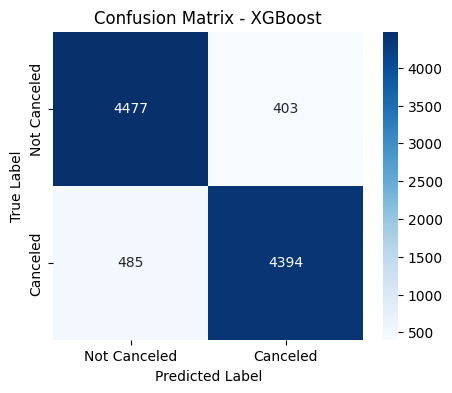

In [220]:
# Initialize a list to store results
results3 = []

for name, model in trained_models.items():
    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    prediction_time = end_time - start_time

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    results3.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "Prediction Time (s)": prediction_time
    })

    # Print classification report
    print(f"\n{name} - Classification Report:\n", classification_report(y_test, y_pred))

    # Compute and visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Canceled", "Canceled"],
                yticklabels=["Not Canceled", "Canceled"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Convert results list into a DataFrame for comparison
results_df3 = pd.DataFrame(results3)

In [221]:
# Display sorted results by Accuracy
print("\nModel Performance Comparison -Case3- :\n")
results_df3.sort_values(by="Accuracy", ascending=False, inplace=True)
results_df3


Model Performance Comparison -Case3- :



,Model,Accuracy,F1 Score,Precision,Recall,Prediction Time (s)
4,Random Forest,0.919766,0.918225,0.936116,0.901004,0.235138
6,XGBoost,0.909007,0.908227,0.915989,0.900594,0.039239
5,Support Vector Machine,0.871606,0.871368,0.872892,0.869850,10.311639
1,KNN (k=3),0.864125,0.863748,0.866062,0.861447,4.737609
3,KNN (k=7),0.861871,0.861970,0.861265,0.862677,2.936181
2,KNN (k=5),0.861461,0.861248,0.862487,0.860012,3.190403
0,Logistic Regression,0.828056,0.827685,0.829389,0.825989,0.007462
